In [24]:
#Importamos las librerias 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [25]:
g20=pd.read_csv('GyC20.csv')
g21=pd.read_csv('GyC21.csv')
g22=pd.read_csv('GyC22.csv')
g23=pd.read_csv('GyC23.csv')

g20=g20.drop(['Unnamed: 0'],axis=1)
g21=g21.drop(['Unnamed: 0'],axis=1)
g22=g22.drop(['Unnamed: 0'],axis=1)
g23=g23.drop(['Unnamed: 0'],axis=1)

**Gastos y Costos 2020**

In [26]:
#g20.info()
#Cuantitativas
# 8:14

#Filtramos las columnas numericas 
cuantitativas = g20.iloc[:,8:15]
cuantitativas.info()

cualitativas = g20.iloc[:,[0,1,2,3,4,5,6,7,16,17]]
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TC         3342 non-null   float64
 1   IMPORTE    3342 non-null   float64
 2   IVA        3342 non-null   float64
 3   RET ISR    3342 non-null   float64
 4   RET IVA    3342 non-null   float64
 5   TOTAL MX   3342 non-null   float64
 6   TOTAL SAT  3342 non-null   float64
dtypes: float64(7)
memory usage: 182.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA        3342 non-null   object
 1   FOLIO        3153 non-null   object
 2   UUID         3342 non-null   object
 3   RFC          3342 non-null   object
 4   PROVEEDOR    3342 non-null   object
 5   TIPO GASTO   3342 non-null   object
 6   GASTO        3342 non-null   object
 7   DESCRIPCION

<Figure size 1500x800 with 0 Axes>

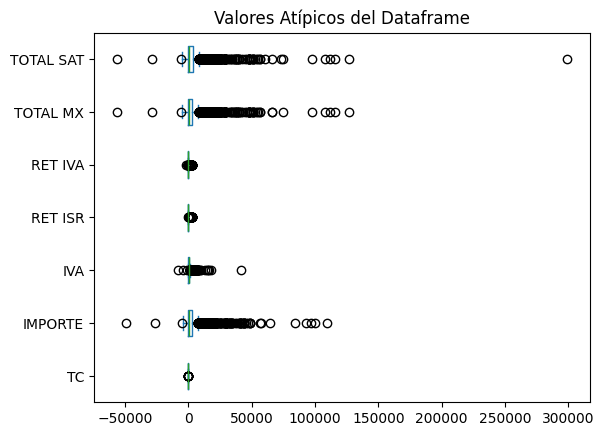

In [27]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [28]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               4.239688
IMPORTE      25167.992859
IVA           4563.165637
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
dtype: float64
Limite inferior permitido TC              -2.129870
IMPORTE     -18869.298785
IVA          -3523.520012
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
dtype: float64


In [29]:
datag20= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
datag20

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [32]:
valores_nulos=datag20.isnull().sum()
valores_nulos

TC            9
IMPORTE      67
IVA          58
RET ISR      21
RET IVA      74
TOTAL MX     65
TOTAL SAT    45
dtype: int64

In [33]:
data_clean=datag20.copy()
data_clean=data_clean.fillna(round(datag20.mean(),1))
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [34]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [36]:

Datos_limpios = pd.concat([data_clean, cualitativas], axis=1)
Datos_limpios

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,STATUS,POLIZA
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,SIN DEFINIR,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",Vigente,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,SIN DEFINIR,COMISION COBRADA,Vigente,NaN
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,SIN DEFINIR,COMISION COBRADA,Vigente,NaN
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,SIN DEFINIR,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,Vigente,NaN
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,SIN DEFINIR,Pago,Vigente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,Vigente,NaN
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,Vigente,NaN
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,Vigente,NaN
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,Vigente,NaN


In [37]:
Datos_limpios.to_csv('G20imputado.csv')